#### 1 Importer les bibliotheques nécessaires

In [6]:
!pip install statsmodels
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import numpy as np

In [8]:
# Charger le dataset Iris
iris = sns.load_dataset('iris')

In [14]:
# Selectionner la variable d'interet (longueur des sépales)
sepal_length= iris['sepal_length']

Une des etapes pour pouvoir verifier la normalité c'est de calculer le skewness et le kurtosis
#### 2 Caracteristiques à calculer pour verifier la normalité

In [17]:
# Calcul du skewness et du kurtonis
skewness = stats.skew(sepal_length)
kurtosis = stats.kurtosis(sepal_length, fisher=False) # Vrai Kurtosis
## Nb : par defaut l'ordinateur calcule l'exces de kurtosis c-a-d la difference entre le kurtosis d'une loi normale et le kurtosis de la série,
## Il faut donc verifier si l'on n'est sur le kurtosis ou l'exces de kurtosis car l'interpretation change en fonction, 
##  Si l'on aun exces de kurtosis, cela veut dire que notre valeur doit etre egale à zero pour que la serie soit comme une loi normale
## si on a le kurtosis, la valeur doit etre egale à 3 pour que la serie soit la loi normale
excess_kurtosis = stats.kurtosis(sepal_length) # vrai kurtosis
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Exces de kurtosis: {excess_kurtosis}")

Skewness: 0.3117530585022963
Kurtosis réel: 2.4264320510750235
Exces de kurtosis: -0.5735679489249765


In [19]:
#  le Skewness = 0.3117530585022963, or il doit etre egale à 0. donc ona un leger ecart par rapport à la normale
# Le Kurtosis réel = 2.4264320510750235, la loi normale on est autours de 3 . Donc on a deja un ecart par rapport à la loi normale
# l"Exces de kurtosis = -0.5735679489249765, or l'exces de Kurtosis normal soit etre egale à zero

## Juste avec cet indicateur, on peut deja supposer que la serie sepal_length n'est pas normalement distribuée

### 3 Analyse graphique

#### 3.1 Histogramme et courbe de densité

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

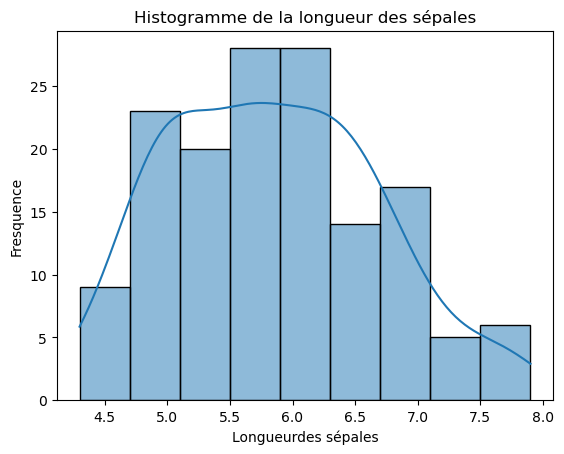

In [22]:
# Histogramme
plt.figure()
sns.histplot(sepal_length, kde=True)
plt.title('Histogramme de la longueur des sépales')
plt.xlabel('Longueurdes sépales')
plt.ylabel('Fresquence')
plt.show

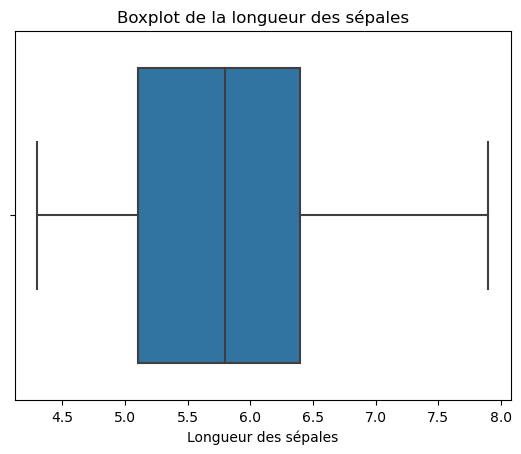

In [24]:
# Cette courbe ne ressembble pas une loi normale, elle n'est pas centrée, elle n'est pas symétrique

## Boxplot 
plt.figure()
sns.boxplot(x=sepal_length)
plt.title('Boxplot de la longueur des sépales')
plt.xlabel('Longueur des sépales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

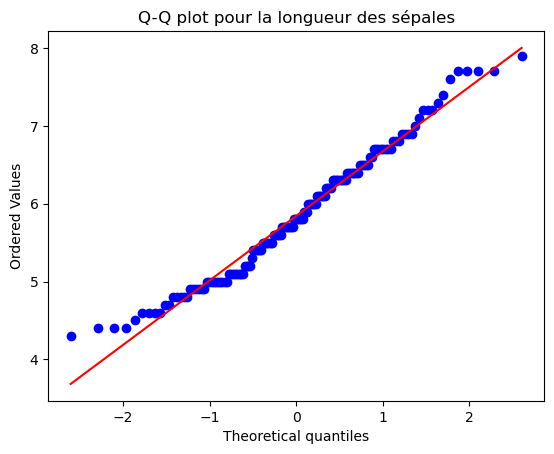

In [28]:
## Un autre graphique pour verifier la normalité, c'est le Q-Q plot (le plus interessant d'ailleurs)
plt.figure()
stats.probplot(sepal_length, plot = plt)
plt.title('Q-Q plot pour la longueur des sépales')
plt.show

In [30]:
# il mesure les quentiles theoriques de la loi normale et les quantiles de la serie. si on avait une normalité, les points 
# devraient etre autours des points

In [36]:
# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de nprmalité
shapiro_test = stats.shapiro(sepal_length)
ks_test = stats.kstest(sepal_length, 'norm')
ad_test = stats.anderson(sepal_length, dist='norm')
dagostino_test = stats.normaltest(sepal_length)
lilliefors_test = lilliefors(sepal_length, dist='norm')

# Creer un tableau pandas avec les resultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})
print(test_results)

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.976090  0.010180       Non
1  Kolmogorov-Smirnov             0.999991  0.000000       Non
2    Anderson-Darling             0.889199       NaN       Oui
3  D'Agostino-Pearson             5.735584  0.056824       Oui
4          Lilliefors             0.088654  0.010291       Non
